

### Importing libraries
Python imports:

In [24]:
#!pip install spacy
import spacy
import string
import re
import itertools
import csv
import shutil
import matplotlib.pyplot as plt
import zipfile
import lzma
import json
import requests
import os
import xml.etree.cElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import random
from nltk.corpus import stopwords 

#!pip install -U spacy unidecode

from unidecode import unidecode
from spacy.matcher import Matcher 
from spacy import displacy 
from IPython.display import Image, display
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import skipgrams
from nltk.corpus import wordnet as wn
from spacy.lang.en import English

from tqdm import tqdm
from ipywidgets import FloatProgress
%matplotlib inline


#!pip install pyquery
#!pip install -U gensim

import gensim
#import pyLDAvis.gensim
import pickle
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_non_alphanum
from gensim.models import CoherenceModel

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading words: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [25]:
#!pip install pyLDAvis
import pyLDAvis.gensim_models  # don't skip this

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## LDA

Performing Topic Model
Topic model is an unsupervised machine learning method that helps discover hidden semantic structures in a paper, that allows to learn topic representations of papers in a corpus.

The model can be applied to any kinds of labels on documents, such as tags on posts on the website.

Here I use Latent Dirichlet Allocation (LDA), one of the most popular topic modeling methods: is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.

In [ ]:
#Load lemmatization 2 data
with open("data_lemmatized_2.pkl", 'rb') as f:
     data_lemmatized_2 = pickle.load(f)

In [ ]:
id2word2 = corpora.Dictionary(data_lemmatized_2)

In [ ]:
id2word2_skip = corpora.Dictionary(list_k)

In [ ]:
#Term Document Frequency
texts = data_lemmatized_2
corpus2 = [id2word2.doc2bow(text) for text in texts]

In [ ]:
corpus2_skip = [id2word2.doc2bow(text) for text in list_k]

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word2[id], freq) for id, freq in cp] for cp in corpus2[:1]]

In [ ]:
[[(id2word2_skip[id], freq) for id, freq in cp] for cp in corpus2_skip[:1]]

In [ ]:
id2word2.save('dictionary2.gensim')

In [ ]:
id2word2_skip.save('dictionary2_skip.gensim')

In [ ]:
with open("corpus2.pkl", "wb") as f:
    pickle.dump(corpus2, f)

In [ ]:
with open("id2word2_skip.pkl", "wb") as f:
    pickle.dump(id2word2_skip, f)

### Save and load model

LDA model can be saved and loaded locally: doing so can reduce time to train model again.

Alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

Chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [ ]:
id2word2.load('dictionary2.gensim')

In [ ]:
id2word2_skip.load('id2word2_skip.gensim')

In [ ]:
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)

In [ ]:
with open("id2word2_skip.pkl", "rb") as f:
    pickle.dump(id2word2_skip, f)

In [ ]:
#For each of the chosen 10 topic, we will explore the words occuring in that topic and their relative weights
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
#MODEL OF INTEREST
ldamodel3 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel4 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel5 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel6 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel_skip = gensim.models.ldamodel.LdaModel(corpus=corpus2_skip,
                                           id2word=id2word2_skip,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
ldamodel2.save('model2.gensim')

In [ ]:
ldamodel3.save('model3.gensim')

In [ ]:
ldamodel4.save('model4.gensim')

In [ ]:
ldamodel5.save('model5.gensim')

In [ ]:
ldamodel6.save('model6.gensim')

In [ ]:
ldamodel_skip.save('ldamodel_skip.gensim')

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data.

The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

Saliency: a measure of how much the term tells you about the topic.

Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data

In [ ]:
#LOAD MODEL 2 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel2 = gensim.models.ldamodel.LdaModel.load('model2.gensim')

In [ ]:
#LOAD MODEL 3 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')

In [ ]:
#LOAD MODEL 4 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel4 = gensim.models.ldamodel.LdaModel.load('model4.gensim')

In [ ]:
#LOAD MODEL 5 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel5 = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [ ]:
#LOAD MODEL 6 AND CORPUS 
id2word2 = gensim.corpora.Dictionary.load('dictionary2.gensim')
with open('corpus2.pkl', 'rb') as f:
    corpus2 = pickle.load(f)
ldamodel6 = gensim.models.ldamodel.LdaModel.load('model6.gensim')

In [ ]:
#LOAD MODEL WITH SKIPGRAMS AND CORPUS 
id2word2__ski = gensim.corpora.Dictionary.load('dictionary2_skip.gensim')
with open('corpus2_skip.pkl', 'rb') as f:
    corpus2_skip = pickle.load(f)
ldamodel_skip = gensim.models.ldamodel.LdaModel.load('ldamodel_skip.gensim')

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant

In [ ]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(ldamodel2, corpus2, id2word2)
vis2

In [ ]:
#MODEL OF INTEREST
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim_models.prepare(ldamodel3, corpus2, id2word2)
vis3

In [ ]:
pyLDAvis.enable_notebook()
vis4 = pyLDAvis.gensim_models.prepare(ldamodel4, corpus2, id2word2)
vis4

In [ ]:
pyLDAvis.enable_notebook()
vis5 = pyLDAvis.gensim_models.prepare(ldamodel5, corpus2, id2word2)
vis5

In [ ]:
pyLDAvis.enable_notebook()
vis6 = pyLDAvis.gensim_models.prepare(ldamodel6, corpus2, id2word2)
vis6

In [ ]:
pyLDAvis.enable_notebook()
vis_skip = pyLDAvis.gensim_models.prepare(ldamodel_skip, corpus2_skip, id2word2_skip)
vis_skip

In [ ]:
words_for_topic_2 = ldamodel2.show_topics(num_topics=15, num_words=10, log=False, formatted=False)
words_for_topic_2

In [ ]:
#MODEL OF INTEREST
words_for_topic_3 = ldamodel3.show_topics(num_topics=20, num_words=30, log=False, formatted=False)
words_for_topic_3

In [ ]:
words_for_topic_4 = ldamodel4.show_topics(num_topics=10, num_words=30, log=False, formatted=False)
words_for_topic_4

In [ ]:
words_for_topic_5 = ldamodel5.show_topics(num_topics=5, num_words=15, log=False, formatted=False)
words_for_topic_5

In [ ]:
words_for_topic_6 = ldamodel6.show_topics(num_topics=30, num_words=20, log=False, formatted=False)
words_for_topic_6

In [ ]:
words_for_topic_skip = ldamodel_skip.show_topics(num_topics=10, num_words=15, log=False, formatted=False)
words_for_topic_skip

## Model perplexity and coherence score

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

#### Perplexity score

In [ ]:
# Compute Perplexity score model 2
print('\nPerplexity Score 2: ', ldamodel2.log_perplexity(corpus2))  # a measure of how good the model 2 is. lower the better.

In [ ]:
# Compute Perplexity score model 3
print('\nPerplexity Score 3: ', ldamodel3.log_perplexity(corpus2))  # a measure of how good the model 3 is. lower the better.

In [ ]:
# Compute Perplexity score model 4
print('\nPerplexity Score 4: ', ldamodel4.log_perplexity(corpus2))  # a measure of how good the model 4 is. lower the better.

In [ ]:
# Compute Perplexity score model 5
print('\nPerplexity Score 5: ', ldamodel5.log_perplexity(corpus2))  # a measure of how good the model 5 is. lower the better.

In [ ]:
# Compute Perplexity score model 6
print('\nPerplexity Score 6: ', ldamodel6.log_perplexity(corpus2))  # a measure of how good the model 5 is. lower the better.

#### Coherence score

In [ ]:
# Compute Coherence Score model 2
coherence_model_lda_2 = CoherenceModel(model=ldamodel2, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score 2: ', coherence_lda_2)

In [ ]:
# Compute Coherence Score model 3
coherence_model_lda_3 = CoherenceModel(model=ldamodel3, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_3 = coherence_model_lda_3.get_coherence()
print('\nCoherence Score 3: ', coherence_lda_3)

In [ ]:
# Compute Coherence Score model 4
coherence_model_lda_4 = CoherenceModel(model=ldamodel4, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_4 = coherence_model_lda_4.get_coherence()
print('\nCoherence Score 4: ', coherence_lda_4)

In [ ]:
# Compute Coherence Score model 5
coherence_model_lda_5 = CoherenceModel(model=ldamodel5, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_5 = coherence_model_lda_5.get_coherence()
print('\nCoherence Score 5: ', coherence_lda_5)

In [ ]:
# Compute Coherence Score model 6
coherence_model_lda_6 = CoherenceModel(model=ldamodel6, texts=data_lemmatized_2, dictionary=id2word2, coherence='c_v')
coherence_lda_6 = coherence_model_lda_6.get_coherence()
print('\nCoherence Score 6: ', coherence_lda_6)

# LDA MALLET MODEL

Mallet’s version often gives a better quality of topics.



In [ ]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = r'C:/mallet-2.0.8/bin/mallet' 
#You should update this path as per the path of Mallet directory on your system.

In [ ]:
mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

In [ ]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

## WORD2VEC

Create a word2vec model and train it with court decisions corpus.

Key parameter description (https://radimrehurek.com/gensim/models/word2vec.html)
-  `sentences` : training data (has to be a list with tokenized sentences)
- `size` : dimension of embedding space
- `sg` : CBOW if 0, skip-gram if 1
- `window` : number of words accounted for each context (if the window size is 3, 3 word in the left neighorhood and 3 word in the - right neighborhood are considered). Maximum distance between the current and predicted word within a sentence
- `min_count` : minimum count of words to be included in the vocabulary
- `iter` : number of training iterations
- `workers` : number of worker threads to train

In [32]:
from scipy.stats import norm
import math
from nltk import ngrams
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Gensim uses a neural network to assign a multidimensional vector that captures the semantic relationship of this word to all the other words in the corpus.

In [5]:
#Load lemmatization 2 data
with open(r"C:\Users\camilla.gotta\Downloads\data_lemmatized_2.pkl", 'rb') as f:
     data_lemmatized = pickle.load(f)

In [6]:
model= gensim.models.Word2Vec(data_lemmatized, window=6, min_count=1, 
                               sg=1, alpha=0.025, batch_words=10000, workers=1)

### Save and load model

word2vec model can be saved and loaded locally: doing so can reduce time to train model again

In [33]:
#model.save('word2vec_model')
model = Word2Vec.load('word2vec_model')

Investigate Word Embeddings
So... what is produced? Gensim uses a neural network to assign a multidimensional vector that captures the semantic relationship of this word to all the other words in the corpus.

Here's what these vectors look like:

In [9]:
model.wv['cocaine']

array([-1.58241782e-02,  6.37994170e-01, -6.37879148e-02,  6.75428152e-01,
        2.70717263e-01,  5.64336121e-01, -3.15862715e-01,  8.10920715e-01,
       -1.99532546e-02, -3.18655014e-01, -1.07413337e-01,  6.66888177e-01,
        1.32467687e-01,  1.63552001e-01,  2.94774175e-01,  1.16131701e-01,
       -2.88968801e-01, -7.49050975e-02,  7.31726736e-02, -6.61392212e-01,
       -1.98981956e-01, -3.25633943e-01,  8.52693856e-01,  4.10762101e-01,
       -2.58974105e-01,  1.55120626e-01, -3.42741907e-01, -7.34748319e-02,
       -7.83788681e-01, -2.05755323e-01,  3.45528722e-01, -1.09063916e-01,
        3.35917920e-01, -1.38631865e-01, -1.68563753e-01, -7.99902976e-02,
       -3.05611849e-01, -4.76528704e-01,  2.39547193e-01,  6.89570978e-02,
       -4.45871800e-01,  4.01632786e-01,  5.98945618e-02,  7.41557598e-01,
        3.15592766e-01, -9.70423967e-02, -1.40021697e-01,  3.47565770e-01,
       -1.65359989e-01, -1.54657900e-01, -1.54416308e-01, -1.15054071e-01,
       -6.95868582e-02, -

Comparing semantic similarity of words.

The similarity of one word to another in the corpus can be calculated using the cosine similarity of the vectors assigned to each word: the semantic similarity may not capture all aspects of a word. For instance, antonymns may be used in such similar sentence structure that they have similar word vectors, even though they have opposite meanings.

First, let's use Gensim to find the words with the highest cosine similarity to an existing word.

In [34]:
financial = model.wv.most_similar('debt', topn=20)

In [35]:
financial_crimes=[]
for word in financial:
    financial_crimes.append(word[0])

In [36]:
financial

[('indebtedness', 0.8551395535469055),
 ('repayment', 0.7288793325424194),
 ('mortgage', 0.7204396724700928),
 ('unpaid', 0.7039926648139954),
 ('repay', 0.684604287147522),
 ('mortgagor', 0.6783332824707031),
 ('indebted', 0.6772611737251282),
 ('unsubordinated', 0.6694698333740234),
 ('payment', 0.6672244668006897),
 ('promissory', 0.6619433760643005),
 ('unsatisfied', 0.6612755060195923),
 ('maturity', 0.6555764079093933),
 ('floran', 0.654913604259491),
 ('satisfaction', 0.6537545323371887),
 ('unsurrendered', 0.6528646349906921),
 ('garnishable', 0.6517601609230042),
 ('pledgor', 0.6515974402427673),
 ('assignor', 0.6486300826072693),
 ('pledgee', 0.6482280492782593),
 ('pledge', 0.6470130085945129)]

In [37]:
weapons = model.wv.most_similar('pistol', topn=20)

In [38]:
weapons

[('revolver', 0.9471077919006348),
 ('gun', 0.9212538003921509),
 ('shotgun', 0.9154477119445801),
 ('revolv', 0.9001919627189636),
 ('handgun', 0.8901242017745972),
 ('rifle', 0.884925901889801),
 ('holster', 0.8350772261619568),
 ('waistband', 0.8309215903282166),
 ('semiautomatic', 0.828421413898468),
 ('weapon', 0.8223859667778015),
 ('shot', 0.8182439804077148),
 ('shoot', 0.8169150352478027),
 ('caliber', 0.8097890019416809),
 ('cocked', 0.808022141456604),
 ('ammunition', 0.8013302683830261),
 ('sawed', 0.7731344103813171),
 ('luger', 0.7719153165817261),
 ('unarmed', 0.766810953617096),
 ('millimeter', 0.7618260979652405),
 ('shooting', 0.7556378841400146)]

In [39]:
weapons_crimes=[]
for word in weapons:
    weapons_crimes.append(word[0])

In [40]:
drug = model.wv.most_similar('cocaine', topn=20)

In [41]:
drug

[('heroin', 0.9244387745857239),
 ('marijuana', 0.8722343444824219),
 ('gram', 0.8406920433044434),
 ('drug', 0.7910417914390564),
 ('ounce', 0.7668494582176208),
 ('amphetamine', 0.7659721374511719),
 ('undercover', 0.7611410617828369),
 ('narcotic', 0.7561902403831482),
 ('paraphernalia', 0.7236723899841309),
 ('nonnarcotic', 0.7227558493614197),
 ('peyote', 0.708125114440918),
 ('baggie', 0.7061018943786621),
 ('powdery', 0.7050648927688599),
 ('mescaline', 0.6996675729751587),
 ('kilogram', 0.6993315815925598),
 ('substance', 0.6921660900115967),
 ('ecstasy', 0.6839138865470886),
 ('barbiturate', 0.6826341152191162),
 ('bag', 0.6822925806045532),
 ('codeine', 0.6767136454582214)]

In [42]:
drug_crimes=[]
for word in drug:
    drug_crimes.append(word[0])

In [43]:
accident = model.wv.most_similar('accident', topn=20)

In [44]:
accident

[('mishap', 0.8264948725700378),
 ('collision', 0.8169166445732117),
 ('injury', 0.7366750240325928),
 ('injured', 0.7114714980125427),
 ('occurrence', 0.692298948764801),
 ('piet', 0.6798914670944214),
 ('blinded', 0.6660870313644409),
 ('crushing', 0.6608407497406006),
 ('skidding', 0.6592949032783508),
 ('intersectional', 0.6584808826446533),
 ('wye', 0.6557889580726624),
 ('widdle', 0.655026376247406),
 ('jerky', 0.654795229434967),
 ('diss', 0.651653528213501),
 ('decelerate', 0.6504678726196289),
 ('millman', 0.6476781368255615),
 ('thud', 0.6473369598388672),
 ('gramme', 0.6466886401176453),
 ('sowin', 0.6466823816299438),
 ('motorcycle', 0.6464685201644897)]

In [45]:
car_accident=[]
for word in accident:
    car_accident.append(word[0])

In [46]:
burglary = model.wv.most_similar('burglary', topn=20)

In [47]:
burglary_case=[]
for word in burglary:
    burglary_case.append(word[0])

In [48]:
burglary

[('theft', 0.8823336362838745),
 ('robbery', 0.800076425075531),
 ('armed', 0.7503112554550171),
 ('crime', 0.7096264362335205),
 ('felony', 0.708621621131897),
 ('offense', 0.7037392854690552),
 ('rape', 0.7017298340797424),
 ('larceny', 0.6901362538337708),
 ('burglar', 0.6861385107040405),
 ('steal', 0.6835877299308777),
 ('arson', 0.6792652010917664),
 ('murder', 0.6734977960586548),
 ('stager', 0.6623508930206299),
 ('misdemeanor', 0.6556264758110046),
 ('battery', 0.6524648666381836),
 ('burglarize', 0.6512502431869507),
 ('felon', 0.6464725136756897),
 ('conviction', 0.6328710317611694),
 ('treacher', 0.6312571167945862),
 ('shoplifting', 0.6242198348045349)]

In [49]:
sexual = model.wv.most_similar('sex', topn=20)

In [50]:
sexual

[('sexual', 0.7700510621070862),
 ('anal', 0.745247483253479),
 ('intercourse', 0.742256224155426),
 ('copulation', 0.718444287776947),
 ('fellatio', 0.7096713185310364),
 ('orgy', 0.70242840051651),
 ('masturbation', 0.6898623704910278),
 ('predator', 0.6861391663551331),
 ('sodomy', 0.68213951587677),
 ('heterosexual', 0.6798267364501953),
 ('arousal', 0.6782926917076111),
 ('penetration', 0.6723476052284241),
 ('anus', 0.670781672000885),
 ('penis', 0.6700444221496582),
 ('nonsexual', 0.6617350578308105),
 ('female', 0.6540780067443848),
 ('deviant', 0.6517698168754578),
 ('peni', 0.6471349000930786),
 ('gratification', 0.6469534635543823),
 ('unscared', 0.6469355821609497)]

In [51]:
sexual_crimes=[]
for word in sexual:
    sexual_crimes.append(word[0])

In [52]:
divorce = model.wv.most_similar('divorce', topn=20)

In [53]:
divorce_case=[]
for word in divorce:
    divorce_case.append(word[0])

In [54]:
model.wv.most_similar('hospital', topn=20)

[('memorial', 0.8137274980545044),
 ('medical', 0.7673564553260803),
 ('physician', 0.7656392455101013),
 ('nurse', 0.7595176696777344),
 ('ambulance', 0.7518970966339111),
 ('patient', 0.7394770383834839),
 ('doctor', 0.724045991897583),
 ('convalesce', 0.7173148989677429),
 ('hydrotherapy', 0.7142049670219421),
 ('clinic', 0.7134445905685425),
 ('physiotherapist', 0.7077373266220093),
 ('dispensary', 0.7027827501296997),
 ('resurrection', 0.6994412541389465),
 ('semicomatose', 0.6969980001449585),
 ('sanatorium', 0.6936947107315063),
 ('hemorrhoidectomy', 0.6904058456420898),
 ('writhe', 0.6889351010322571),
 ('deaconess', 0.6885527968406677),
 ('hospitalization', 0.684134840965271),
 ('trepanning', 0.6814844608306885)]

In [55]:
model.wv.most_similar('statutory', topn=20)

[('statute', 0.8340400457382202),
 ('legislature', 0.716341495513916),
 ('statutorily', 0.6991127729415894),
 ('section', 0.6963271498680115),
 ('referent', 0.6884633302688599),
 ('unwieldly', 0.685542643070221),
 ('scind', 0.6672105193138123),
 ('vagabondage', 0.6671062707901001),
 ('reimprisonment', 0.6661648750305176),
 ('perorate', 0.6656830310821533),
 ('praemunire', 0.6632622480392456),
 ('rodding', 0.6628711819648743),
 ('noteworthiness', 0.659975528717041),
 ('mandator', 0.657524049282074),
 ('unvoluntary', 0.6567579507827759),
 ('unexpunged', 0.6556622385978699),
 ('undeterminate', 0.6551295518875122),
 ('unreferenced', 0.6548281311988831),
 ('abstractness', 0.653925359249115),
 ('enactment', 0.6537795662879944)]

### Plotting And Visualization
we'll visualize the degree of positive and negative semantic association of virtues and vices with "good" and "bad".

In [36]:
weapons = ['revolver',
 'gun',
 'shotgun',
 'handgun',
 'revolv',
 'rifle',
 'semiautomatic',
 'holster',
 'waistband',
 'caliber',
 'shot',
 'weapon',
 'shoot',
 'cocked',
 'ammunition',
 'shooting',
 'sawed',
 'millimeter',
 'bullet',
 'knife']
drug = ['heroin',
 'marijuana',
 'gram',
 'drug',
 'amphetamine',
 'undercover',
 'ounce',
 'narcotic',
 'paraphernalia',
 'nonnarcotic',
 'powdery',
 'bag',
 'baggie',
 'foil',
 'substance',
 'opium',
 'dope',
 'mescaline',
 'packet',
 'kilogram']
weapons_score = [model.wv.similarity(['pistol'], word) for word in weapons]
drug_score = [model.wv.similarity(['drug'], word) for word in drug]

C:\Users\camilla.gotta\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


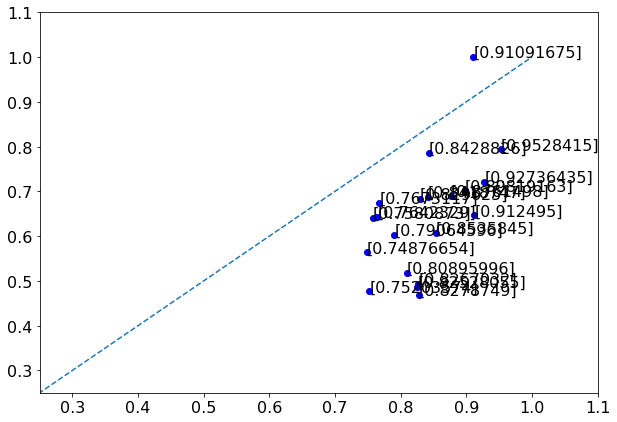

In [37]:
%matplotlib inline
_, ax = plt.subplots(figsize=(10,7))
ax.scatter(weapons_score, drug_score, alpha=1, color='b')
for i in range(len(weapons_score)):
    ax.annotate(weapons_score[i], (weapons_score[i], drug_score[i])).set_fontsize(16)
ax.set_xlim(.25, 1.1)
ax.set_ylim(.25, 1.1)
ax.yaxis.label.set_fontsize(16)
ax.xaxis.label.set_fontsize(16)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.savefig('plot.png')

### Words similarity over time

### Classification of law cases

In [27]:
#Load data
with open("opinion_texts_notok.pkl", 'rb') as f:
     opinion_texts_notok = pickle.load(f)

In [56]:
financial = (opinion_texts_notok['Text'].str.contains("|".join(financial_crimes))) 
weapons = (opinion_texts_notok['Text'].str.contains("|".join(weapons_crimes))) 
drug = (opinion_texts_notok['Text'].str.contains("|".join(drug_crimes))) 
accident = (opinion_texts_notok['Text'].str.contains("|".join(car_accident))) 
burglary = (opinion_texts_notok['Text'].str.contains("|".join(burglary_case))) 
sexual = (opinion_texts_notok['Text'].str.contains("|".join(sexual_crimes)))
divorce = (opinion_texts_notok['Text'].str.contains("|".join(divorce_case)))

In [57]:
crimes = [financial, weapons, drug, accident, burglary, sexual, divorce]

In [58]:
# create a list of the values we want to assign for each condition
values = ['finance', 'weapons', 'drug', 'accident', 'burglary','sexual','divorce']

# create a new column and use np.select to assign values to it using our lists as arguments
opinion_texts_notok['crimes'] = np.select(crimes, values)

# display updated DataFrame
opinion_texts_notok.tail()

,Text,crimes
186365,armed robbery murder tried separately followin...,weapons
186366,brought damages sustained directed verdict evi...,finance
186367,murder armed robbery following armed robbery m...,weapons
186368,declaratory damages negotiate procure sought f...,sexual
186369,offense propriety allegedly noise engaged burg...,accident


In [60]:
accident = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="accident"] #13514
finance= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="finance"] #26529
weapons= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="weapons"] #14596
burglary= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="burglary"] #19675
drug= opinion_texts_notok.loc[opinion_texts_notok['crimes']=="drug"] #9537
sexual = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="sexual"] #7375
divorce = opinion_texts_notok.loc[opinion_texts_notok['crimes']=="divorce"] #3817

#tot 80.447/197785 = 40%

In [70]:
weapons

,Text,crimes
9,guilty degree murder burglary proven guilty re...,weapons
14,robbery assault guilty armed robbery murder co...,weapons
15,following guilty degree murder conviction foll...,weapons
16,reconsideration sentence offense raised imposi...,weapons
17,following guilty degree murder sexual assault ...,weapons
...,...,...
186353,conviction degree murder prison sentence rever...,weapons
186362,dismissal conviction conviction evidentiary ag...,weapons
186363,forensic evidence raise reasonable probability...,weapons
186365,armed robbery murder tried separately followin...,weapons


In [63]:
with open("accident.pkl", "wb") as f:
    pickle.dump(accident, f)

In [64]:
with open("weapons.pkl", "wb") as f:
    pickle.dump(weapons, f)

In [65]:
with open("finance.pkl", "wb") as f:
    pickle.dump(finance, f)

In [66]:
with open("burglary.pkl", "wb") as f:
    pickle.dump(burglary, f)

In [67]:
with open("drug.pkl", "wb") as f:
    pickle.dump(drug, f)

In [68]:
with open("sexual.pkl", "wb") as f:
    pickle.dump(sexual, f)

In [69]:
with open("divorce.pkl", "wb") as f:
    pickle.dump(divorce, f)